### Notes on possibility to combine detection of lines outside the capillary and particles inside the capillary to find capillari(es) boundaries on Line Cam image:

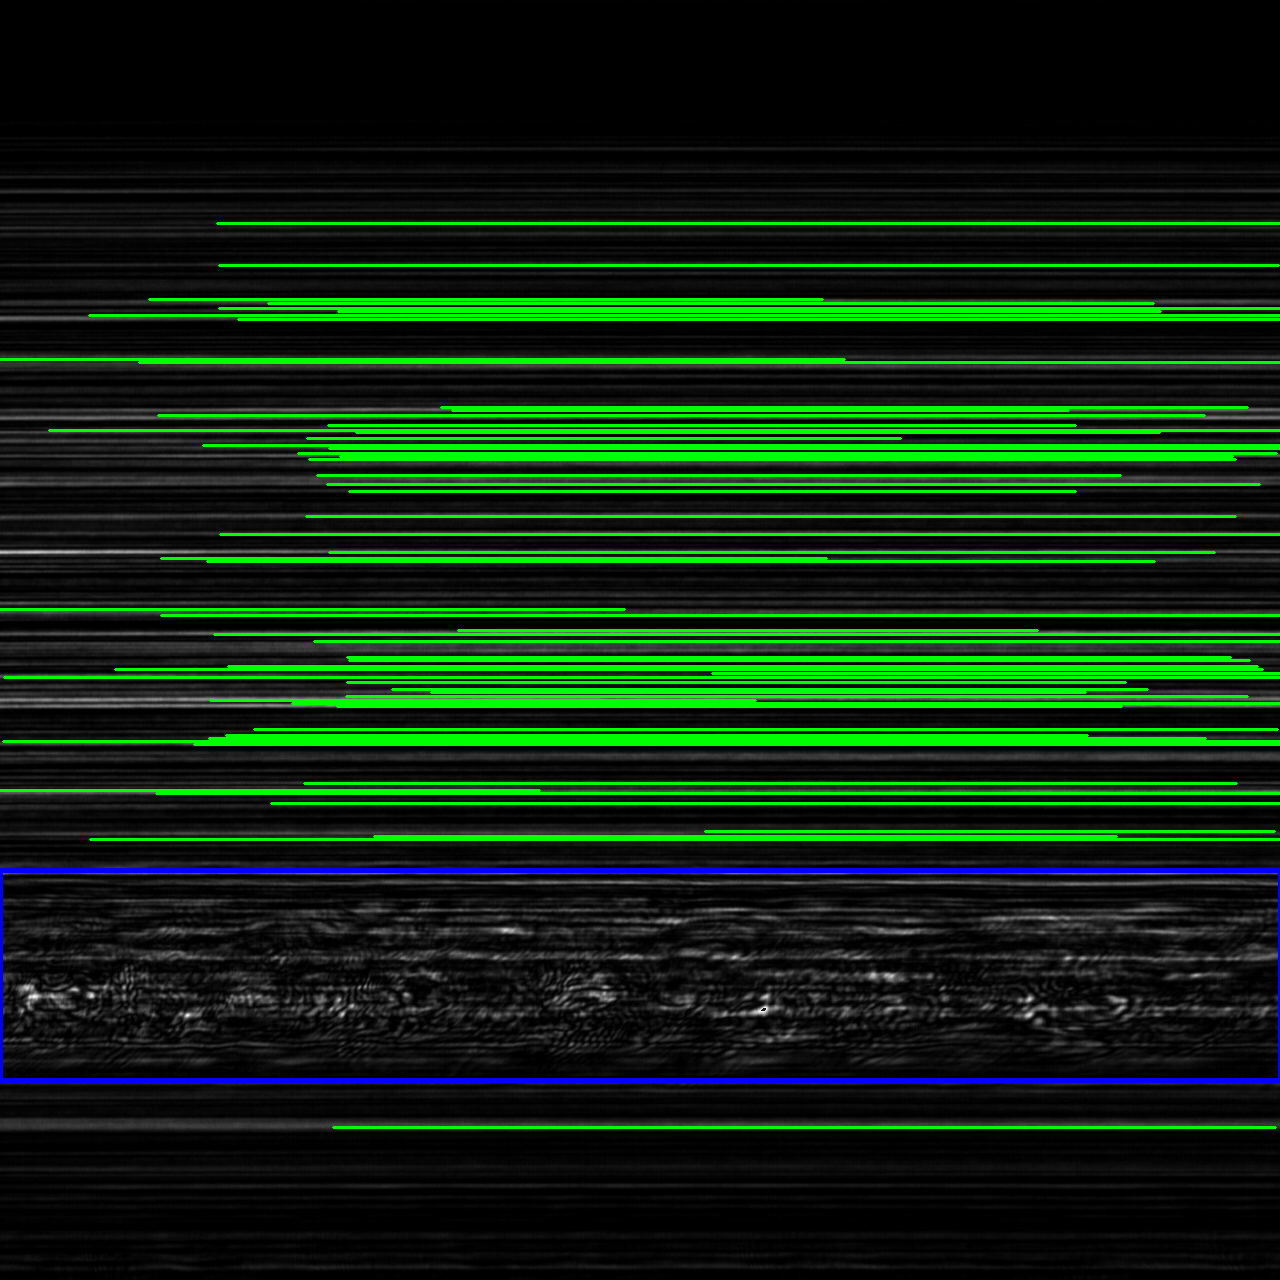

In [2]:
import cv2
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
img = cv2.imread('LineCam_213_8b.tif')
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
edges = cv2.Canny(img,50,150,apertureSize = 3)
#sigma = 0.33
#v = np.median(img)
#lower = int(max(0, (1.0 - sigma) * v))
#upper = int(min(255, (1.0 + sigma) * v))
#edges = cv2.Canny(img, lower, upper,apertureSize = 3)
#cv2_imshow(edges)
lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 5,minLineLength = 500,maxLineGap = 10)

ys = []
for line in lines:
    x1,y1,x2,y2 = line[0]
    ys.append(y1)
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

ys.sort()
diff = [y2 - y1 for y1, y2 in list(zip(ys[:-1], ys[1:]))]
index_max = diff.index(np.max(diff))
cv2.rectangle(img, (0, ys[index_max]), (img.shape[1], ys[index_max + 1]), color=(255, 0, 0), thickness=4)
cv2_imshow(img)

In [3]:
!pip install trackpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 131 kB 5.3 MB/s 
  Created wheel for trackpy: filename=trackpy-0.5.0-py3-none-any.whl size=128767 sha256=c50fbd732cbeb6b2479415a404fcb6ed684b25d14a89356e1ae80bbe8973f67e
  Stored in directory: /root/.cache/pip/wheels/fa/0b/63/748d0a53a28526c0bfd68b1b71b3a107060a1cfdb5849ae2d1
Successfully built trackpy


In [4]:
!pip install pims

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.1 MB/s 
  Created wheel for pims: filename=PIMS-0.6.1-py3-none-any.whl size=82636 sha256=62346829d96415168f5c9ea550678c1c94a19052c1a612734af971f2429be554
  Stored in directory: /root/.cache/pip/wheels/8e/d5/a9/f702433436655b7a2bc7ff93efd742587dd5abd44f7e406917
Successfully built pims


In [22]:
import trackpy as tp
import pims
img = cv2.imread('LineCam_213_8b.tif')
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
frames = pims.open('LineCam_213_8b.tif')
frame = img[:, :, 0]
f = tp.locate(frames[0], 91,minmass=1500, separation=120,noise_size=22, invert=False, smoothing_size=99,threshold=5, percentile=1, topn=None, preprocess=True, filter_after=True, characterize=True )

In [23]:
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
1,85.718934,423.155699,2624.719417,18.680257,0.791223,5.400022,200907.0,5.670100,0
4,243.387016,1016.782609,6858.375483,14.288211,0.272857,8.138605,151158.0,9.692195,0
6,392.467456,992.771187,5442.528204,13.071383,0.101288,7.984319,182430.0,6.703248,0
7,454.043274,465.748894,3644.629346,20.736639,0.683431,6.248597,188801.0,6.306997,0
8,514.318431,1014.625644,8895.688187,15.174200,0.096802,9.450039,201870.0,5.624916,0


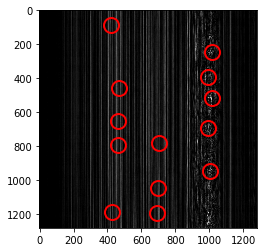

In [49]:
tp.annotate(f, frames[0])

In [24]:
t = tp.link(f, 5, memory=0)

In [40]:
t1 = tp.filter_stubs(t, 5)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 13
After: 0


In [44]:
t

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
1,85.718934,423.155699,2624.719417,18.680257,0.791223,5.400022,200907.0,5.670100,0,0
4,243.387016,1016.782609,6858.375483,14.288211,0.272857,8.138605,151158.0,9.692195,0,1
6,392.467456,992.771187,5442.528204,13.071383,0.101288,7.984319,182430.0,6.703248,0,2
7,454.043274,465.748894,3644.629346,20.736639,0.683431,6.248597,188801.0,6.306997,0,3
8,514.318431,1014.625644,8895.688187,15.174200,0.096802,9.450039,201870.0,5.624916,0,4
11,648.086138,464.111159,3946.374879,22.541990,0.739039,5.978596,188687.0,6.313675,0,5
12,692.381458,991.206611,10226.176542,15.603744,0.094205,9.218610,195236.0,5.951641,0,6
13,779.717416,702.111682,1809.393191,24.772674,0.896424,6.171454,209830.0,5.277303,0,7
14,794.453029,464.689622,2808.821607,23.637541,0.759921,5.862881,188419.0,6.329431,0,8
16,945.514622,1005.951497,8121.054986,14.224690,0.138152,9.064323,172365.0,7.441896,0,9


In [47]:
t2 = t[((t['mass'] > 3000) & (t['size'] < 20.6) &
         (t['ecc'] < 0.9))]

In [48]:
t2

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
4,243.387016,1016.782609,6858.375483,14.288211,0.272857,8.138605,151158.0,9.692195,0,1
6,392.467456,992.771187,5442.528204,13.071383,0.101288,7.984319,182430.0,6.703248,0,2
8,514.318431,1014.625644,8895.688187,15.174200,0.096802,9.450039,201870.0,5.624916,0,4
12,692.381458,991.206611,10226.176542,15.603744,0.094205,9.218610,195236.0,5.951641,0,6
16,945.514622,1005.951497,8121.054986,14.224690,0.138152,9.064323,172365.0,7.441896,0,9


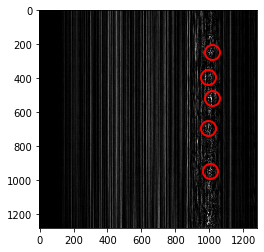

In [50]:
from matplotlib import pyplot as plt
plt.figure()
tp.annotate(t2[t2['frame'] == 0], frames[0])